In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [27]:
#Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv
df = pd.read_csv("Datos-COVID19/output/producto16/CasosGeneroEtario.csv",usecols=["Grupo de edad", "Sexo", "2020-05-08"])

In [28]:
df

,Grupo de edad,Sexo,2020-05-08
0,00 - 04 años,M,277
1,05 - 09 años,M,194
2,10 - 14 años,M,247
3,15 - 19 años,M,370
4,20 - 24 años,M,1045
5,25 - 29 años,M,1747
6,30 - 34 años,M,1807
7,35 - 39 años,M,1506
8,40 - 44 años,M,1272
9,45 - 49 años,M,1177


Text(0, 0.5, 'Cantidad de Infectados')

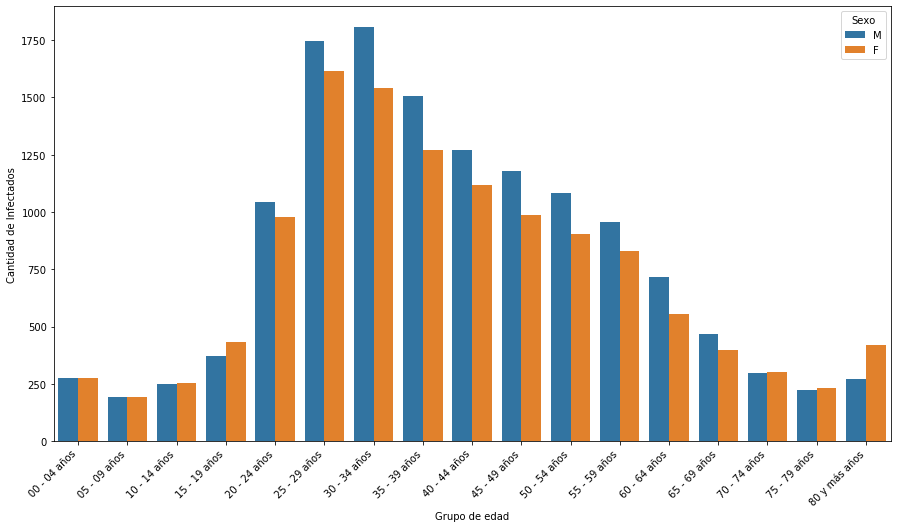

In [55]:
plt.figure(figsize=(15,8))
chart=sns.barplot(x='Grupo de edad', y='2020-05-08',hue='Sexo', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45 , horizontalalignment='right')
plt.ylabel('Cantidad de Infectados')


###El grupo etario más afectado han sido aquellos que tienen entre 25 a 39 años con una tasa de 44,6 por cada 100.000 habitantes.

### Preguna 2: Gráfico de Torta para la cantidad de casos confirmados de contagiados totales para las regiones (comunas) de Chile (Valparaíso).

In [86]:
##Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv
df = pd.read_csv("Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv",usecols=[0 , 1, 6])
df.columns = [c.replace(' ', '_') for c in df.columns]
df

,Region,Casos__totales__acumulados,%__Total
0,Arica y Parinacota,340,1.18%
1,Tarapaca,520,1.80%
2,Antofagasta,978,3.39%
3,Atacama,124,0.43%
4,Coquimbo,135,0.47%
5,Valparaiso,933,3.23%
6,Metropolitana,20353,70.51%
7,O'Higgins,195,0.68%
8,Maule,441,1.53%
9,Nuble,812,2.81%


In [113]:
region_types =[]
region_types = df['Region'].unique()
region_types[:-1]

array(['Arica  y  Parinacota', 'Tarapaca', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaiso', 'Metropolitana', "O'Higgins", 'Maule',
       'Nuble', 'Biobio', 'Araucania', 'Los  Rios', 'Los  Lagos', 'Aysen',
       'Magallanes'], dtype=object)

In [181]:
cantidad =[]
#total_types = df['%__Total'].unique() 
total_types = df['Casos__totales__acumulados'].unique() 
#for jt in total_types:
    #print(jt.replace('%', ''))
    #cantidad.append(float(jt.replace('%', '')))
    #print(df[df['%__Total']==jt]['%__Total'])
#print(cantidad[:-1])
print(total_types[:-1])

len(cantidad[:-1])





[  340   520   978   124   135   933 20353   195   441   812   899  1454
   206   575     8   893]


0

### Gráfico por Regiones

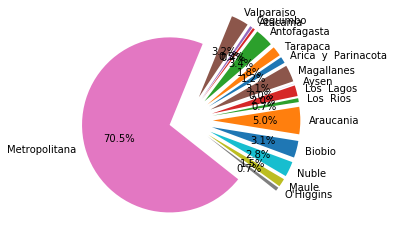

In [251]:
etiquetas = region_types[:-1]
totales = total_types[:-1]
etiquetas
totales
explode = (0.3, 0.3, 0.3, 0.3, 0.3,0.3, 0.2 , 0.3, 0.3, 0.3,0.3, 0.3, 0.3,0.3,0.3,0.3)
plt.figure()
plt.plot(figsize=(40,20))
plt.pie(totales, explode=explode, labels=etiquetas, autopct='%1.1f%%',  startangle=30);

plt.axis('equal');


## El mayor pocentaje de  contagiados a nivel nacional lo lidera la región Metrpolitana con un 70,5%. El 29,5% restante se distribuye a nivel nacional en las regiones restantes las cuales no sobrepasan el 5% cada una.  De las restante a Aracania es la con mayor porcentaje (5%).

### Comunas de Valparaíso

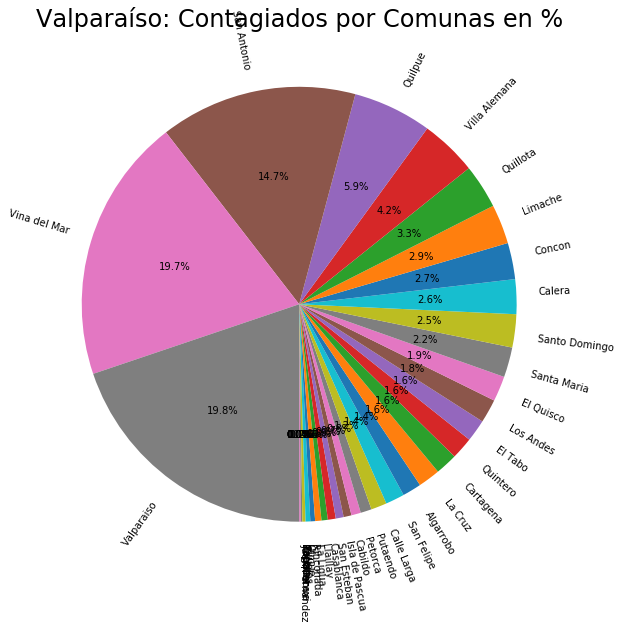

In [296]:
#Datos-COVID19/output/producto2/2020-05-08-CasosConfirmados.csv
df = pd.read_csv("Datos-COVID19/output/producto2/2020-05-08-CasosConfirmados.csv")

dfRegion=df.loc[df['Region']=='Valparaíso',['Region','Comuna','Casos Confirmados']]  
dfRegion=dfRegion.sort_values('Casos Confirmados');

explode = np.zeros(len(dfRegion['Comuna'].unique()),int)

totales = dfRegion['Casos Confirmados'].astype(int)
etiquetas = dfRegion['Comuna'].unique()
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(totales, explode=explode, labels=etiquetas, autopct='%1.1f%%',  startangle=-90,rotatelabels=True);
plt.title("Valparaíso: Contagiados por Comunas en %", fontsize = 24);

#for region in regiones:
 

### La mayoria de los casos se concentran en la principales ciudades de la Región con el 55% de lo casos para las ciudades de Valparaíso, Viña del Mar y San Antonio.

### Pregunta 3:  Mostrar el gráfico de dispersión y otro en escala semilog de la cantidad de casos confirmados de contagios totales para Chile (Valparaíso) en el tiempo.

In [461]:
#Datos-COVID19/output/producto3/CasosTotalesCumulativo.csv
df = pd.read_csv("Datos-COVID19/output/producto3/CasosTotalesCumulativo_T.csv")
#df = (pd.melt(df).rename(columns={'Region' : 'Fecha'}))
del df['Total']
df

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-05-06,318,339,855,80,97,716,15582,145,408,791,789,1362,200,541,7,818
65,2020-05-07,325,417,895,87,100,781,16828,151,414,793,814,1385,202,545,8,836
66,2020-05-08,327,459,923,88,111,828,17979,167,425,794,842,1403,203,548,8,867
67,2020-05-09,337,485,947,117,129,878,18957,182,432,801,882,1418,206,559,8,881


### Chile

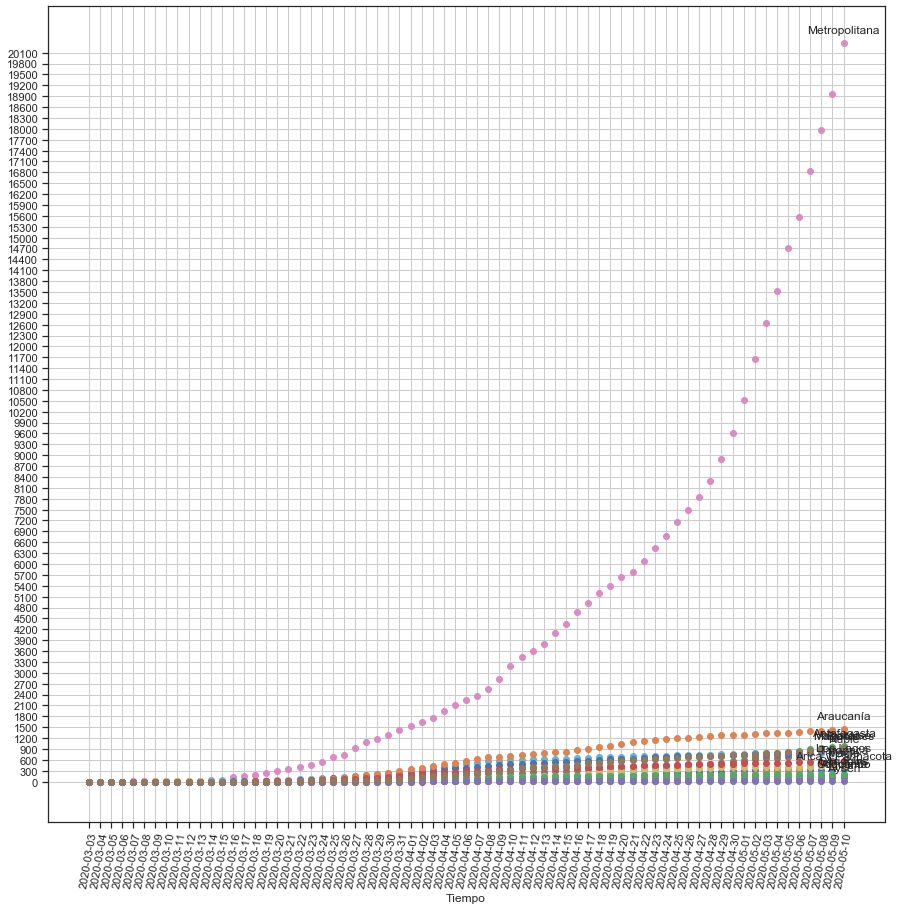

In [477]:
regiones = []
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, 20353, 300)
reg = df.columns

for r in reg:
    if(r != 'Region') :
        regiones.append(r)

fig, ax1 = plt.subplots(figsize = (15,15))
for region in regiones:
    chart=ax1.scatter(df['Region'], df[region])
    #for x,y in zip(df['Region'],df[region]):
    x1 =df['Region']
    y1 =df[region]
    x=x1[len(x1)-1]
    y=y1[len(y1)-1]
    label = region # this method is called for each point
    plt.annotate(label, # this is the text
    (x,y), # this is the point to label
    textcoords="offset points", # how to position the text
    xytext=(0,10), # distance from text to points (x,y)
    ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(regiones)),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
ax1.set_yticks(yE)
plt.grid(True)


In [478]:
# Escala logaritmica

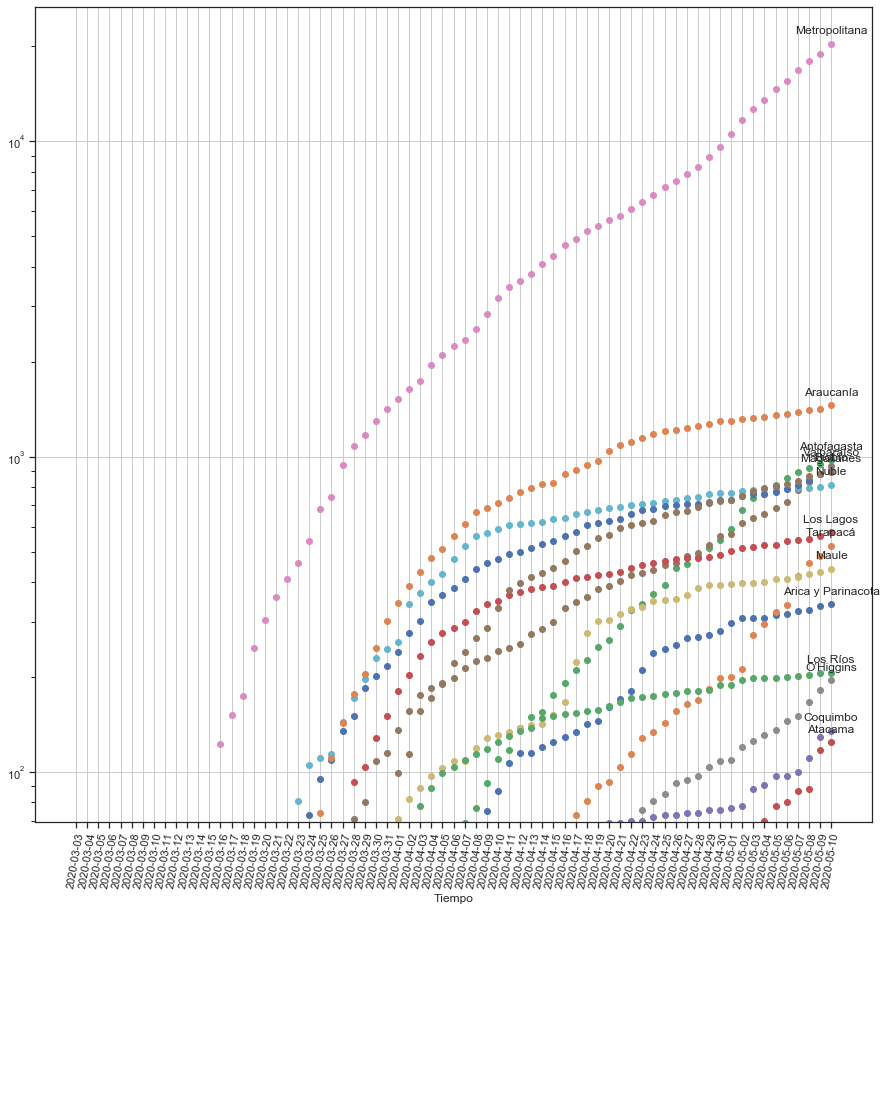

In [479]:
regiones = []
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, 20353, 300)
reg = df.columns

for r in reg:
    if(r != 'Region') :
        regiones.append(r)

fig, ax1 = plt.subplots(figsize = (15,15))
for region in regiones:
    chart=ax1.scatter(df['Region'], df[region])
    #for x,y in zip(df['Region'],df[region]):
    x1 =df['Region']
    y1 =df[region]
    x=x1[len(x1)-1]
    y=y1[len(y1)-1]
    label = region # this method is called for each point
    plt.annotate(label, # this is the text
    (x,y), # this is the point to label
    textcoords="offset points", # how to position the text
    xytext=(0,10), # distance from text to points (x,y)
    ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(regiones)),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
ax1.set_yticks(yE)
plt.yscale('log')
plt.grid(True)

### Valparaíso

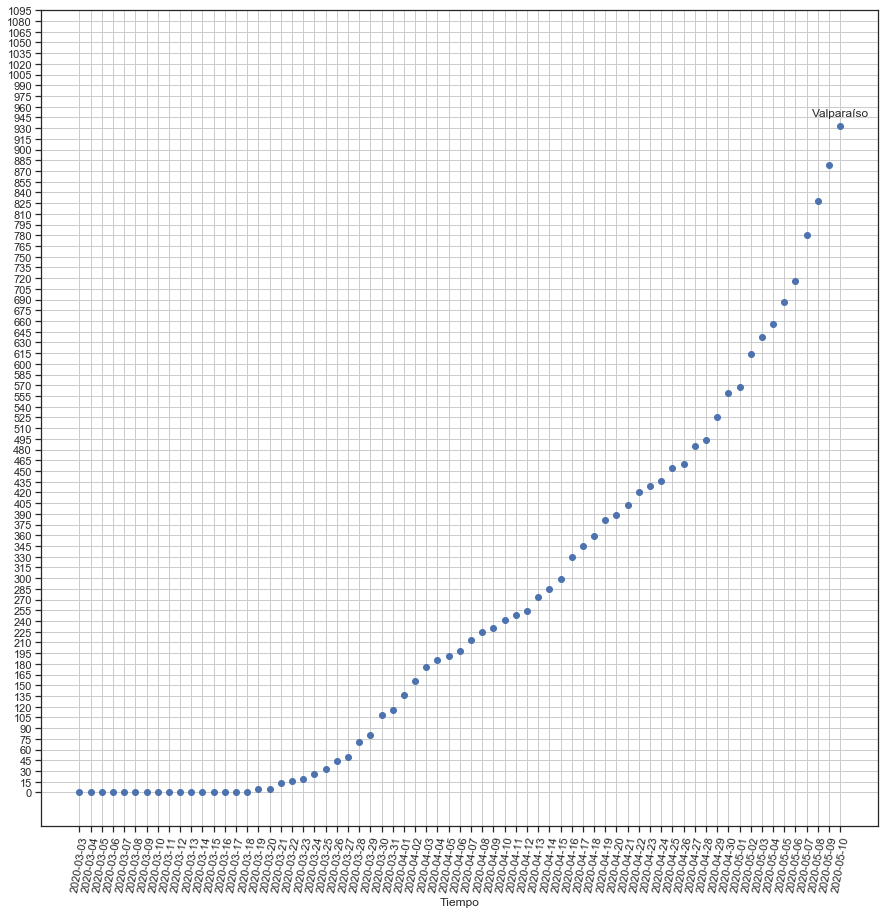

In [473]:
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, 1100, 15)

fig, ax1 = plt.subplots(figsize = (15,15))

chart=ax1.scatter(df['Region'], df['Valparaíso'])
    #for x,y in zip(df['Region'],df[region]):
x1 =df['Region']
y1 =df['Valparaíso']
x=x1[len(x1)-1]
y=y1[len(y1)-1]
label = 'Valparaíso' # this method is called for each point
plt.annotate(label, # this is the text
(x,y), # this is the point to label
textcoords="offset points", # how to position the text
xytext=(0,10), # distance from text to points (x,y)
ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(df['Region'])),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
ax1.set_yticks(yE)
#plt.yscale('log')
plt.grid(True)

In [474]:
# Escala Logaritmica

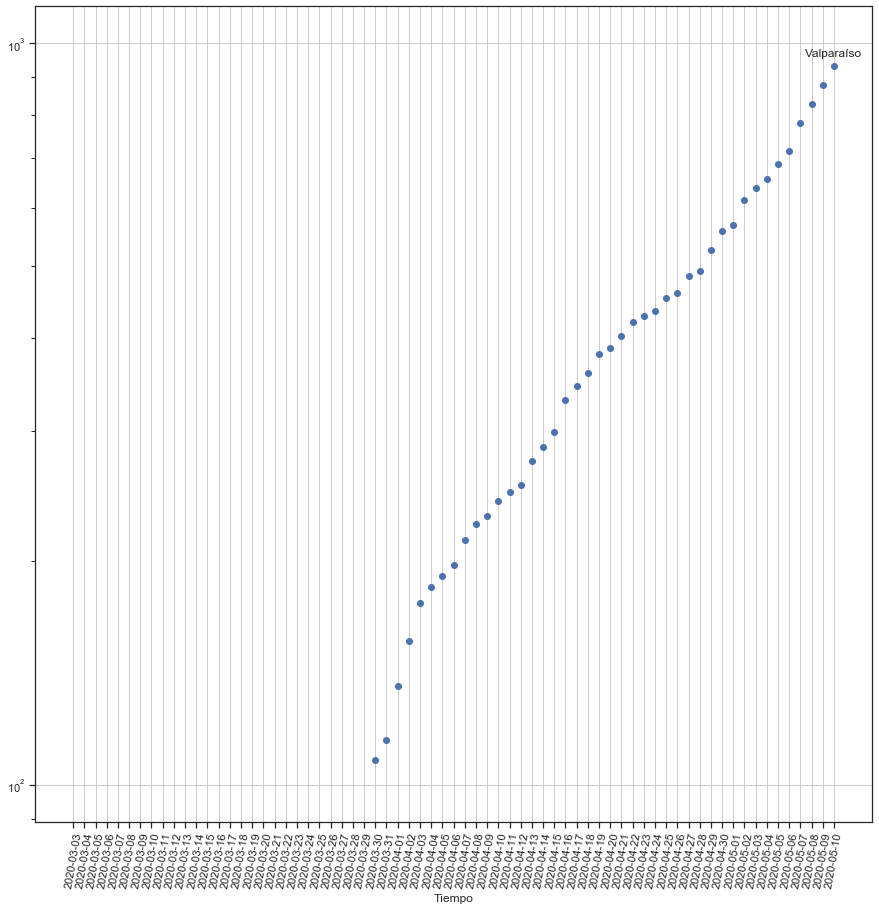

In [475]:
yE = np.arange(0, 1100, 15)

fig, ax1 = plt.subplots(figsize = (15,15))

chart=ax1.scatter(df['Region'], df['Valparaíso'])
    #for x,y in zip(df['Region'],df[region]):
x1 =df['Region']
y1 =df['Valparaíso']
x=x1[len(x1)-1]
y=y1[len(y1)-1]
label = 'Valparaíso' # this method is called for each point
plt.annotate(label, # this is the text
(x,y), # this is the point to label
textcoords="offset points", # how to position the text
xytext=(0,10), # distance from text to points (x,y)
ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(df['Region'])),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
#ax1.set_yticks(yE)
plt.yscale('log')
plt.grid(True)

### Pregunta 4: A partir de los casos de contagios totales en el tiempo, obtener la cantidad de casos diarios y realizar el gráfico de barras.